# INVESTIGATING THE TITANIC

### Background

The purpose of this project is to perform data analysis on a sample dataset. In this case, the dataset is a passenger manifesto of the infamous Titanic disaster, which provides demographic information about the passengers who survived and did not suvive the disaster. Do note that the dataset only contains information about 891 of the 2,224 passengers and crew members on board the Titanic. It is assumed that the sample size of 891 passengers is a fair representation of the passengers on board the Titanic

This dataset was obtained from the Kaggle website (https://www.kaggle.com/c/titanic/data).

## Investigation

It is a known fact that one of the reasons this particular disaster led to such a loss of life was because there was an insufficient number of lifeboats to cater for everyone on board. Although we would like to assume that in the face of impending doom, people would remain civil enough to save the women and children first regardless of social-economic standing, I would like to confirm this theory. To do this, I will attempt to address the following questions:

1. What was the survival rate by age?
2. What was the survival rate by gender?
3. Did women and children really have a higher chance of survival?
4. Being a male aged 32, what would be my chances of survival in a similar situation?
5. Did social-economic standing help a passenger's chances of survival?



## Data Wrangling

It is important before embarking on this analysis, to first understand the dataset that I will be analyzing. Each row in the dataset provided represents a single passenger on the Titanic with the following information given for each passenger:

- **Survived**: indicates if the passenger survived (0=No; 1=Yes) 
- **Pclass**: passenger class (1=1st class; 2=2nd class; 3=3rd class) 
- **Name**: name
- **Sex**: gender
- **Age**: age (in years)
- **SibSp**: number of siblings/spouse aboard
- **Parch**: number of parents/children aboard
- **Ticket**: ticket number
- **Fare**: fare paid
- **Cabin**: cabin number
- **Embarked**: port of embarkation (C=Cherbourg; Q=Queenstown; S=Southampton)

It is important to note for the purpose of this analysis that 'Pclass' will be use as the proxy for social-economic status/standing, 1st class being upperclass, 2nd class being middleclass, and 3rd class being lowerclass.

With respect to the family relationship variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
- **Sibling**: brother, sister, stepbrother, or stepsister of passenger aboard Titanic
- **Spouse**: husband or wife of passenger aboard Titanic (mistresses and fiances ignored)
- **Parent**: mother or father of passenger aboard Titanic
- **Child**: son, daughter, stepson, or stepdaughter of passenger aboard Titanic

### Reviewing Dataset

The following section is to import critical libraries as well as to read and load in the dataset

In [1]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set_style("dark")

# Read in the dataset, create dataframe
titanic_data = pd.read_csv('titanic_data.csv')

# Review format
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,NaN,NaN,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN


In [2]:
# Review data types
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
dtype: object

### Cleaning Dataset

Based on the questions posed above and data available, I have deemed the following columns unneccesary to the analysis and hence will proceed to remove them from the dataset for analysis:

- **PassengerId**: unique identifier but provides no statistical value 
- **Name**: unique identifier but provides no statistical value 
- **Ticket**: unique identifier but provides no statistical value 
- **Cabin**: this would be relevant if we knew the location of the cabins and therefore could speculate that survival rate had some correlation with location of cabin. But because we do not have that information, this column is not required.
- **Fare**: as Pclass is being used as a proxy for social-economic standing, this value is redundant

Along with removing the columns above, I will also check for duplicates and data format issues. Before removing the columns that help us identify each passenger uniquely, I will first remove duplicate entries, followed by removing unneccessary columns and lastly, fix data format issues.

In [3]:
# Remove duplicate entries
duplicated_entries = titanic_data.duplicated()
print 'Number of duplicated entries: ' + str(duplicated_entries.sum())

Number of duplicated entries: 0


In [4]:
# Remove unneccesary columns
titanic_data_clean = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
titanic_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,3,male,22.0,1,0,S,NaN,NaN,NaN,NaN,NaN
1,1,1,female,38.0,1,0,C,NaN,NaN,NaN,NaN,NaN
2,1,3,female,26.0,0,0,S,NaN,NaN,NaN,NaN,NaN
3,1,1,female,35.0,1,0,S,NaN,NaN,NaN,NaN,NaN
4,0,3,male,35.0,0,0,S,NaN,NaN,NaN,NaN,NaN


In [5]:
# Fix data format issues
titanic_data_clean.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
Unnamed: 12    891
Unnamed: 13    889
Unnamed: 14    891
Unnamed: 15    891
Unnamed: 16    890
dtype: int64

In [6]:
# Review data with missing age
age_is_null_entries = pd.isnull(titanic_data_clean['Age'])
titanic_data_clean[age_is_null_entries].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
5,0,3,male,NaN,0,0,Q,NaN,NaN,NaN,NaN,NaN
17,1,2,male,NaN,0,0,S,NaN,NaN,NaN,NaN,NaN
19,1,3,female,NaN,0,0,C,NaN,NaN,NaN,NaN,NaN
26,0,3,male,NaN,0,0,C,NaN,NaN,NaN,NaN,NaN
28,1,3,female,NaN,0,0,Q,NaN,NaN,NaN,NaN,NaN


As much of the analysis is based on age and this dataset is itself a sample size (i.e. 891) of the total number of passengers aboard the Titanic (i.e. 2224), I decided to remove the entries where age was null.

In [7]:
# Review data with missing age
titanic_data_clean.dropna(subset=['Age'], inplace=True)

# Check if age is null data has been removed
titanic_data_clean.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Embarked         2
Unnamed: 12    714
Unnamed: 13    712
Unnamed: 14    714
Unnamed: 15    714
Unnamed: 16    713
dtype: int64

I did not feel a need to remove the 2 entries where 'Embarked' was null as it did not constitute a large portion of our dataset. Anyway at this point, I was unsure whether 'Embarked' would be used in the analysis. As such I maintained the column in the event that I wanted to review survival rate by embarkation point.

Before proceeding to answer the questions posed, I did one last high-level exploration of the dataset to get a better grasp of the data being analyzed. 

In [8]:
# Looking at some typical descriptive statistics
titanic_data_clean.describe()

,Survived,Pclass,Age,SibSp,Parch,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,714.000000,714.000000,714.000000,714.000000,714.000000,0.0,2.000000,0.0,0.0,1.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,NaN,0.440880,NaN,NaN,0.652174
std,0.491460,0.838250,14.526497,0.929783,0.853289,NaN,0.372879,NaN,NaN,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,NaN,0.177215,NaN,NaN,0.652174
25%,0.000000,1.000000,20.125000,0.000000,0.000000,NaN,0.309048,NaN,NaN,0.652174
50%,0.000000,2.000000,28.000000,0.000000,0.000000,NaN,0.440880,NaN,NaN,0.652174
75%,1.000000,3.000000,38.000000,1.000000,1.000000,NaN,0.572713,NaN,NaN,0.652174
max,1.000000,3.000000,80.000000,5.000000,6.000000,NaN,0.704545,NaN,NaN,0.652174


Some high-level observations:

- Approximately 40.6% of the passengers survived
- The average Pclass is 2.24, meaning that there are more lower-class passengers in our sample size than upper-class passengers
- The average age is 29.7 years old with the youngest person being 0.42 years old and the oldest person being 80 years old

As I would be calculating the survival rate for many different categories (age, gender, social-economic status), I started by first creating a few helper functions to calculate survival rate.

In [9]:
# Helper function calculates survival rate for one grouping

# Takes in a dataset, column name within the dataset to group by and a certain value in that column
# Note: if the column name is 'Age', the user is expected to provide a range (e.g. [45.001,50])
# Outputs the survival rate accurate to 2 decimal points
def calc_survival_rate_1D(dataframe, group, value):
    if group == 'Age':
        total_num = dataframe.groupby([group]).size()[value[0]:value[1]].sum().astype('float')
        if (dataframe[dataframe['Survived']==1].groupby([group]).size()[value[0]:value[1]].sum()==0):
            return 0
        else:
            survive_num = dataframe[dataframe['Survived']==1].groupby([group]).size()[value[0]:value[1]].sum().astype('float')
    else:
        total_num = dataframe.groupby([group]).size()[value].astype('float')
        survive_num = dataframe[dataframe['Survived']==1].groupby([group]).size()[value].astype('float')
    return (survive_num/total_num*100).round(2)

# Uncomment for testing
#calc_survival_rate_1D(titanic_data_clean,'Pclass',1)
#calc_survival_rate_1D(titanic_data_clean,'Age',[45.001,50])

In [10]:
# Helper function calculates survival rate for two groupings

# Takes in a dataset, column names within the dataset to group by and values in the repective columns
# Note: if the column name is 'Age', the user is expected to provide a range (e.g. [45.001,50])
# Outputs the survival rate accurate to 2 decimal points
def calc_survival_rate_2D(dataframe, group, value):
    if (group[0]=='Age' or group[1]=='Age'):
        if group[0]=='Age':
            total_num = dataframe[dataframe[group[1]]==value[1]].groupby([group[0]]).size()[value[0][0]:value[0][1]].sum().astype('float')
            if dataframe[(dataframe['Survived']==1) & (dataframe[group[1]]==value[1]) ].groupby([group[0]]).size()[value[0][0]:value[0][1]].sum()==0:
                return 0
            else:
                survive_num = dataframe[(dataframe['Survived']==1) & (dataframe[group[1]]==value[1]) ].groupby([group[0]]).size()[value[0][0]:value[0][1]].sum().astype('float')
        elif group[1]=='Age':
            total_num = dataframe[dataframe[group[0]]==value[0]].groupby([group[1]]).size()[value[1][0]:value[1][1]].sum().astype('float')
            if dataframe[(dataframe['Survived']==1) & (dataframe[group[0]]==value[0]) ].groupby([group[1]]).size()[value[1][0]:value[1][1]].sum()==0:
                return 0
            else:
                survive_num = dataframe[(dataframe['Survived']==1) & (dataframe[group[0]]==value[0]) ].groupby([group[1]]).size()[value[1][0]:value[1][1]].sum().astype('float')
    else:
        total_num = dataframe.groupby([group[0], group[1]]).size()[value[0], value[1]].astype('float')
        survive_num = dataframe[dataframe['Survived']==1].groupby([group[0], group[1]]).size()[value[0], value[1]].astype('float')
    return (survive_num/total_num*100).round(2)

# Uncomment for testing
#calc_survival_rate_2D(titanic_data_clean,['Pclass','Sex'],[3,'male'])
#calc_survival_rate_2D(titanic_data_clean,['Age', 'Sex'],[[5.001,10],'male'])
#calc_survival_rate_2D(titanic_data_clean,['Sex', 'Age'],['male', [5.001,10]])
#calc_survival_rate_2D(titanic_data_clean,['Pclass', 'Age'],[3, [5.001,10]])

In [11]:
# Helper function calculates survival rate for three groupings

# Takes in a dataset and values in the following order: 'Pclass' value, 'Sex' type, 'Age' range
# Note: for 'Age', the user is expected to provide a range (e.g. [45.001,50])
# Outputs the survival rate accurate to 2 decimal points
def calc_survival_rate_3D(dataframe, value):
    total_num = dataframe[(dataframe['Pclass']==value[0]) & (dataframe['Sex']==value[1])].groupby(['Age']).size()[value[2][0]:value[2][1]].sum().astype('float')
    survive_num = dataframe[(dataframe['Survived']==1) & (dataframe['Pclass']==value[0]) & (dataframe['Sex']==value[1])].groupby(['Age']).size()[value[2][0]:value[2][1]].sum().astype('float')
    return (survive_num/total_num*100).round(2)

# Uncomment for testing
#calc_survival_rate_3D(titanic_data_clean,[1,'male',[30.001,35]])

## Question 1 - What was the Survival Rate by Age?

Firstly I was interested to see the distribution of ages in the data set to identify what would be an appropriate number of bins to segregate the passengers into.

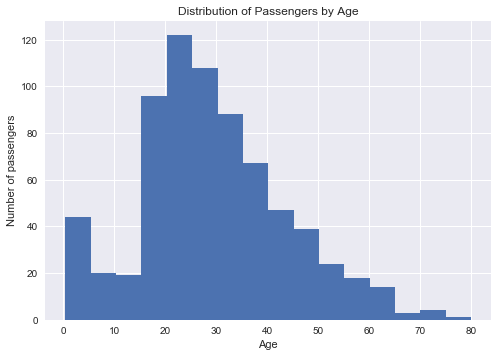

In [12]:
#Plot histogram of passenger's age distribution
titanic_data_clean.hist(column='Age', bins=16)
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.title("Distribution of Passengers by Age")

Being as the oldest person was 80, it was deemed most logical to break the age groups into 16 bins (i.e. each bin to span 5 years).

Next was to visualize the age distribution of those that survived and those that did not.

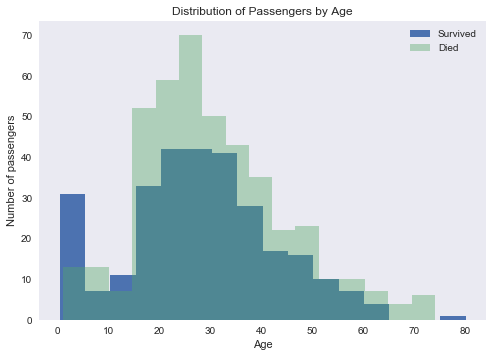

In [13]:
#Plot histogram of passenger's age distribution segregated by who survived and who did not
titanic_data_clean.Age[titanic_data_clean.Survived == 1].plot(kind='hist', bins=16)
titanic_data_clean.Age[titanic_data_clean.Survived == 0].plot(kind='hist', bins=16, alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.title("Distribution of Passengers by Age")
plt.legend(('Survived','Died'))

Survival Rate (0.0 < Age <= 5.0): 70.45%
Survival Rate (5.0 < Age <= 10.0): 35.0%
Survival Rate (10.0 < Age <= 15.0): 57.89%
Survival Rate (15.0 < Age <= 20.0): 34.38%
Survival Rate (20.0 < Age <= 25.0): 34.43%
Survival Rate (25.0 < Age <= 30.0): 38.89%
Survival Rate (30.0 < Age <= 35.0): 46.59%
Survival Rate (35.0 < Age <= 40.0): 41.79%
Survival Rate (40.0 < Age <= 45.0): 36.17%
Survival Rate (45.0 < Age <= 50.0): 41.03%
Survival Rate (50.0 < Age <= 55.0): 41.67%
Survival Rate (55.0 < Age <= 60.0): 38.89%
Survival Rate (60.0 < Age <= 65.0): 28.57%
Survival Rate (65.0 < Age <= 70.0): 0%
Survival Rate (70.0 < Age <= 75.0): 0%
Survival Rate (75.0 < Age <= 80.0): 100.0%


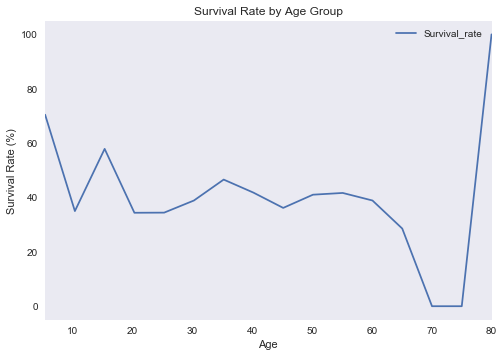

In [37]:
#Calulate and print out survival rates by age groups 
survival_rate_by_age_groups = []
index = []
bins = 16
age_bins = pd.cut(titanic_data_clean['Age'].values, bins, retbins=True)

for i in range(0,bins):
    
    survival_rate = calc_survival_rate_1D(titanic_data_clean, 'Age', [age_bins[1][i],age_bins[1][i+1]])
    survival_rate_by_age_groups.append({'Survival_rate': survival_rate})
    index.append(age_bins[1][i+1])
    print 'Survival Rate (' + str(age_bins[1][i].round(0)) + ' < Age <= ' + str(age_bins[1][i+1].round(0)) + '): ' + str(survival_rate) + '%'

#Plot line graph of survival rates by age group
df = pd.DataFrame(survival_rate_by_age_groups, index)
df.plot()
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age")
plt.title("Survival Rate by Age Group")

#### Conclusion

As expected the survival rate was slightly better for passengers aged 15 years old and younger. However for the rest of the age groups, the survival rate ranged between 34% and 46%. The spike at age 80 can be disregarded as there was only one person aged 80 and he survived. In general, however, the survival rate declined for passengers above the age of 60.

## Question 2 - What was the Survival Rate by Gender?

Moving on, I wanted to verify if gender played a role in a passenger's chances of survival.

In [ ]:
#Calulate and print out survival rates by gender 
survival_rate_by_sex = []
index = []
for i in ['male','female']:
    survival_rate = calc_survival_rate_1D(titanic_data_clean, 'Sex', i)
    survival_rate_by_sex.append({'Survival_rate': survival_rate})
    index.append(i)
    print 'Survival Rate (' + i + '): ' + str(survival_rate) + '%'

#Plot histogram of survival rates by gender
df = pd.DataFrame(survival_rate_by_sex, index)
df.plot(kind='bar', rot=0)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Sex")
plt.title("Survival Rate by Gender")

#### Conclusion

It is clear that female passengers had a significantly higher chance of surviving the Titanic disaster than their male counterparts. To be exact, females were 3.6 times more likely to survive compared to males. 

## Question 3 - Did women and children really have a higher chance of survival?

Based on the results presented in question 2, it would appear that women definitely were given higher priority when deciding who should be allowed to board the lifeboats. As for children, it would appear that our modern day definition of a child (i.e. less than 18 years old) is probably a little different than the definition of a child in the 1900's. Because the survival rate for persons above 15 years old mirrors that of the survival rate of persons aged 20-60, one can infer that only persons below the age of 15 would have been considered a child when selecting who should board the lifeboats first. 

## Question 4 - Being a male age 32, what would be my chances of survival in a similar situation?

Just in case I was ever in a situation similar to the Titanic, using Titanic as a proxy, I was curious to know what would be my chances of survival.

In [ ]:
print 'Average Survival Rate: ' + str((titanic_data_clean['Survived'].mean()*100).round(2)) + '%'
print ''

#Calulate and print out survival rates of males across all age groups 
survival_rate_by_male_age_groups = []
index = []
for i in range(0,16):
    start_age = i*5
    end_age = (i+1)*5
    
    survival_rate = calc_survival_rate_2D(titanic_data_clean, ['Sex', 'Age'], ['male', [start_age+0.001,end_age]])
    survival_rate_by_male_age_groups.append({'Survival_rate': survival_rate})
    index.append(end_age)
    if end_age == 35:
        print '\033[1m' + 'Survival Rate (Male, ' + str(start_age) + ' < Age <= ' + str(end_age) + '): ' + str(survival_rate) + '%' + '\033[0m'
    else:
        print 'Survival Rate (Male, ' + str(start_age) + ' < Age <= ' + str(end_age) + '): ' + str(survival_rate) + '%'

#Plot line graph of survival rates of males across all age groups 
df = pd.DataFrame(survival_rate_by_male_age_groups, index)
df.plot()
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age")
plt.title("Survival Rate by Age Group (Male)")


#### Conclusion

As a male aged 32, my chances of survival is one of the lowest at 26%, 15% points lower than the global average of 41%. Therefore in order to survive such a disaster I would have to rely on other factors besides my age and gender to increase by chances of survival.   

## Question 5 - Did social-economic standing help a passenger's chances of survival?

Being interested in my own self-preservation, I wanted to quantify how much more I would increase my chances of survival by making sure I buy a first class ticket the next time I am on a cruise ship.

In [ ]:
#Calulate and print out survival rates by social economic status 
survival_rate_by_class = []
class_name = ['Upperclass', 'Middleclass', 'Lowerclass']
index = []
for i in [1,2,3]:
    survival_rate = calc_survival_rate_1D(titanic_data_clean, 'Pclass', i)
    survival_rate_by_class.append({'Survival_rate': survival_rate})
    index.append(class_name[i-1])
    print 'Survival Rate (' + index[i-1] + '): ' + str(survival_rate) + '%'

#Plot histogram of survival rates by social economic status
df = pd.DataFrame(survival_rate_by_class, index)
df.plot(kind='bar', rot=0)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Class")
plt.title("Survival Rate by Class")

It is clear from the results above that upperclass passengers were given priority to board the lifeboats. Either that or their cabins were located closer to the lifeboats and therefore were given priority on a first-come, first-serve basis. But if the crew members were truly working on a first-come, first-serve basis, then I would assume the survival rate of males and females in the upperclass would be roughly equal. 

In [ ]:
#Calulate and print out survival rates by social economic status and gender  
survival_rate_by_class_sex = []
class_name = ['Upperclass', 'Middleclass', 'Lowerclass']
index = []
i=1
while i<=3:
    survival_rate_by_class_sex_row = []
    for j in ['male','female']:
        survival_rate = calc_survival_rate_2D(titanic_data_clean, ['Pclass', 'Sex'], [i, j])
        survival_rate_by_class_sex_row.append(survival_rate)
        index.append(class_name[i-1] + '-' + j)

        print 'Survival Rate (' + class_name[i-1] + '-' + j + '): ' + str(survival_rate) + '%'
    print '\n'
    survival_rate_by_class_sex.append(survival_rate_by_class_sex_row)
    i+=1
    
#Plot histogram of survival rates by social economic status and gender  
df = pd.DataFrame(survival_rate_by_class_sex, index=class_name, columns=['male','female'])
df.plot(kind='bar', rot=0)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Class-Sex")
plt.title("Survival Rate by Class and Gender") 

Across all social-economic groups, the probability of women surviving is significantly higher than men which indicates that the crew members were prioritizing women, regardless of social economic status, to board the life boats first. However these results also show that if you were an upperclass passenger, your chances or survival were indeed higher irregardless of gender. 

As I am narcissistic, I wanted to know how much higher my chances of survival would be if I were to buy a first class ticket versus an economy ticket.

In [ ]:
#Calulate and print out survival rates of males aged 30-35 across all classes  
class_name = ['Upperclass', 'Middleclass', 'Lowerclass']
index = []

for i in [1,2,3]:
    survival_rate = calc_survival_rate_3D(titanic_data_clean, [i, 'male', [30.001,35]])
    index.append(class_name[i-1] + ', Male aged 30-35')
    print 'Survival Rate (' + index[i-1] + '): ' + str(survival_rate) + '%'

If you refer back to question 4, as a male aged 32, my chances of survival was at 26%. By buying a first class ticket, I can improve my odds of survivng by 2.6x. However, if I choose to buy any other ticket besides a first class ticket, I reduce my chances of survival even further to ~18%. 

## Conclusion

Before providing the conclusions, it should be highlighted again that this dataset only accounts for 891 of the 2,224 passengers and crew members that were aboard the Titanic. We are uncertain how this dataset was obtained and if it truly represents a random sample. It could be that the lower class is under-represented in this sample because they failed to provide their names and information to the passenger manifesto or that this dataset is skewed towards a certain port of embarkation. The graphs below seem to refute the former but support the latter assertion as there seems to be a much higher percentage of passengers in the sample dataset embarking from Southampton. But again, this could also be because Southampton is a bigger port. Nevertheless, these caveats are being highlighted to emphasize the point that the conclusions drawn below are being derived based on a sample of the total population and that the origins of the sample dataset are uncertain.    

In [ ]:
#Plot histogram of number of passengers in each class
class_name = ['Upperclass', 'Middleclass', 'Lowerclass']
sns.factorplot('Pclass', data = titanic_data_clean, kind = 'count').set_xticklabels(class_name)
plt.xlabel("Class")
plt.ylabel("Number of passengers")
plt.title("Number of Passengers by Class")

In [ ]:
#Plot histogram of number of passengers from each port
port_name = ['Southampton', 'Cherbourg', 'Queenstown']
sns.factorplot('Embarked', data = titanic_data_clean, kind = 'count').set_xticklabels(port_name)
plt.xlabel("Port")
plt.ylabel("Number of passengers")
plt.title("Number of Passengers by Port")

In summary, these are the following conclusions we can make from the given dataset:

1. Survival rates for children were slightly higher although the definition of a child in this case is below the age of 15
2. Women were definitely given priority regardless of age and social economic standing
3. A passenger's chances of survival were very dependent on their social economic standing. Upperclass and middleclass passengers were clearly given priority over the lowerclass passengers  
4. If I want to survive another Titanic-like disaster, I should buy a first class ticket. Any other ticket would surely result in my demise